In [4]:
from bs4 import BeautifulSoup
from urllib.request import Request
from urllib.parse import quote
from urllib.request import urlopen
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import platform
import numpy as np
from PIL import Image
import collections

In [5]:
def make_wordcloud(word_list, stopwords, word_count):
    okt = Okt()
    counts = Counter(word_list)
    tags = counts.most_common(word_count)
    tag_dict = dict(tags)
    # 검색어 제외 방법 : dict에서 해당 검색어 제거
    for stopword in stopwords:
        if stopword in tag_dict:
            tag_dict.pop(stopword)
            
    print('-' * 80)
    print('tag_dict:', tag_dict)
    if platform.system() == 'Windows':
        path = r'c:\Windows\Fonts\malgun.ttf'
    elif platform.system() == 'Darwin': # Mac OS
        path = r'/System/Library/Fonts/AppleGothic'
    else:
        path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'
        
    img_mask = np.array(Image.open('cloud.png'))
    wordcloud = WordCloud(font_path=path, width=800,
                        height=600,
                        background_color="white",
                        max_font_size=200,
                        repeat=True,
                        colormap='inferno',
                        mask=img_mask)
    
    cloud = wordcloud.generate_from_frequencies(tag_dict)
    
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()

In [6]:
sector_list = ['주요업무• Docker 기반 오피스 솔루션 구축 및 유지보수• 기업 요청사항에 따른 솔루션 기능개발[사용하는 기술 및 환경]• Docker, Spring Java, JPA, JavaScript, JSP, jQuery, Ajax, HTML5, CSS',
 '주요업무- 번역의 의뢰부터 진행/검수/납품/결제까지의 전 단계를 커버하는 번역 서비스 플랫폼을 만듭니다.',
 '주요업무• Unity 3D 개발• 디지털 트윈 플랫폼 개발• Unity 엔진을 이용한 그래픽 시뮬레이션 프로그램 개발',
 '주요업무[담당 업무]DataSpace 플랫폼 설계 및 아키텍쳐 정의• DataSpace 플랫폼 상세 서비스 설계• B2B 마켓플레이스 플랫폼 설계• 검색(SEO), 추천 시스템, 트랜잭션 설계 등 플랫폼 핵심 기능 설계• 데이터 거래 중심의 비즈니스 프로세스 최적화서비스 아키텍처 설계• 결제 및 트랜잭션 관리 시스템 설계 및 운영• 데이터 기반 고객 맞춤형 솔루션 설계• 디지털 자산 거래 솔루션 설계 및 운영Data Space R&D 팀 리더십• 팀 빌딩 및 조직화• 효율적인 개발 환경 및 인프라 구축',
 '주요업무AI Model Optimization• 모델 압축(양자화, 프루닝 등), 연산자 퓨전, 메모리 최적화 기법을 활용하여 모델 성능 개선 및 모델 추론 속도 향상• CPU/GPU/NPU등 HW를 고려한 AI모델 최적화 기법 개발• 필요한 AI 모듈(예: 객체 인식, 이상 탐지 등)을 최적화하여 실시간 실행 성능 확보• AI 모델 병렬화 및 분산 실행 기술 적용Tool 체인 개발• AI 모델 변환 및 최적화를 위한 툴체인 설계 및 구현신기술 리서치 및 연구 • AI 및 Hardware 가속기 관련 최신 기술 및 연구 동향 분석']

In [17]:
ns_list = []

In [21]:
for i in sector_list:
    mid_list = i.replace('•',' ').split()
    for j in mid_list:
        ns_list.append(j)
    

In [23]:
ns_list

['주요업무',
 'Docker',
 '기반',
 '오피스',
 '솔루션',
 '구축',
 '및',
 '유지보수',
 '기업',
 '요청사항에',
 '따른',
 '솔루션',
 '기능개발[사용하는',
 '기술',
 '및',
 '환경]',
 'Docker,',
 'Spring',
 'Java,',
 'JPA,',
 'JavaScript,',
 'JSP,',
 'jQuery,',
 'Ajax,',
 'HTML5,',
 'CSS',
 '주요업무-',
 '번역의',
 '의뢰부터',
 '진행/검수/납품/결제까지의',
 '전',
 '단계를',
 '커버하는',
 '번역',
 '서비스',
 '플랫폼을',
 '만듭니다.',
 '주요업무',
 'Unity',
 '3D',
 '개발',
 '디지털',
 '트윈',
 '플랫폼',
 '개발',
 'Unity',
 '엔진을',
 '이용한',
 '그래픽',
 '시뮬레이션',
 '프로그램',
 '개발',
 '주요업무[담당',
 '업무]DataSpace',
 '플랫폼',
 '설계',
 '및',
 '아키텍쳐',
 '정의',
 'DataSpace',
 '플랫폼',
 '상세',
 '서비스',
 '설계',
 'B2B',
 '마켓플레이스',
 '플랫폼',
 '설계',
 '검색(SEO),',
 '추천',
 '시스템,',
 '트랜잭션',
 '설계',
 '등',
 '플랫폼',
 '핵심',
 '기능',
 '설계',
 '데이터',
 '거래',
 '중심의',
 '비즈니스',
 '프로세스',
 '최적화서비스',
 '아키텍처',
 '설계',
 '결제',
 '및',
 '트랜잭션',
 '관리',
 '시스템',
 '설계',
 '및',
 '운영',
 '데이터',
 '기반',
 '고객',
 '맞춤형',
 '솔루션',
 '설계',
 '디지털',
 '자산',
 '거래',
 '솔루션',
 '설계',
 '및',
 '운영Data',
 'Space',
 'R&D',
 '팀',
 '리더십',
 '팀',
 '빌딩',
 '및',
 '조직화',
 '효율적인',
 '개발',
 '환경',
 '및'

sector_list len: 196
--------------------------------------------------------------------------------
tag_dict: {'설계': 10, '개발': 6, '플랫폼': 5, '모델': 5, '솔루션': 4, 'AI': 4, '기술': 3, '기반': 2, '구축': 2, '서비스': 2, 'Unity': 2, '디지털': 2, '트랜잭션': 2, '데이터': 2, '거래': 2, '팀': 2, '최적화': 2, '성능': 2}


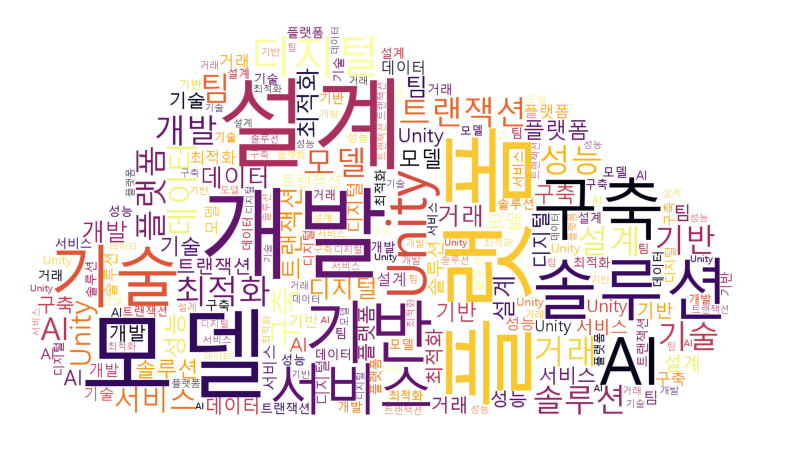

In [31]:

stopwords = ['및', '주요업무'] # wordcloud에서 제외할 단어

print(f'sector_list len: {len(ns_list)}')
make_wordcloud(ns_list, stopwords, 20)